In [1]:
import pickle
import re
import numpy as np

basis_file = '/home/anton/Documents/Tulane/Research/PNC_Good/AngleBasis1.pkl'
demodir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/PNC/'

basis = pickle.load(open(basis_file, 'rb'))

thetas = []
jitter = []
age = []

demo = pickle.load(open(f'{demodir}/demographics.pkl', 'rb'))

for subtask in basis:
    m = re.search('([^-]+)-(.*)', subtask)
    sub = m.group(1)
    task = m.group(2)
    a = demo['age_at_cnb'][sub]
    age.append(a)
    thetas.append(basis[subtask]['thetas'][0])
    jitter.append(basis[subtask]['jitter'][0])
    
thetas = np.stack(thetas)
jitter = np.stack(jitter)
age = np.array(age)

print([a.shape for a in [thetas, jitter, age]])
print(np.mean(age))

[(634, 264), (634, 264), (634,)]
14.011041009463723


In [208]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

def rmse(yhat, y):
    if isinstance(yhat, np.ndarray) or isinstance(yhat, int):
        f = np.mean
    else:
        f = torch.mean
    return f((y-yhat)**2)**0.5

# t0 = np.expand_dims(thetas, 1)
# t1 = np.expand_dims(thetas, 2)
# j0 = np.expand_dims(jitter, 1)
# j1 = np.expand_dims(jitter, 2)
# p = np.cos(t0-t1)
# a,b = np.triu_indices(264, 1)
# p = p[:,a,b]
# t = t[:,1:]-t[:,:-1]
# t = np.concatenate([thetas, 3.14*(jitter-0.5)], axis=1)

xtr, xt, ytr, yt = train_test_split(thetas, age, train_size=0.8)

mu = np.mean(ytr)
ytr -= mu
yt -= mu

reg = Ridge(alpha=100).fit(xtr, ytr)
yhat = reg.predict(xt)
print(rmse(yhat, yt))
print(rmse(0, yt))

3.6677098962145367
3.4372786731659675


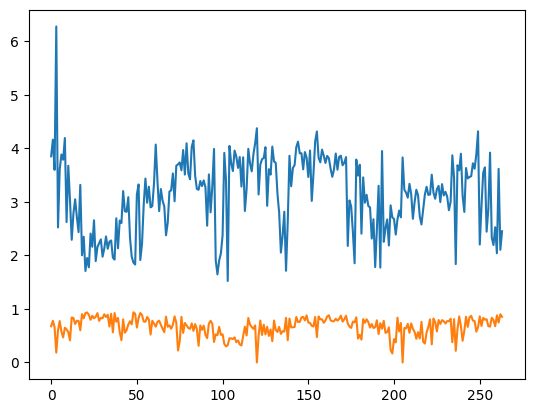

In [211]:
import matplotlib.pyplot as plt

plt.plot(thetas[4])
plt.plot(jitter[4])
# plt.xlim([40,60])
plt.show()